In [23]:
%matplotlib inline 
import csv
import numpy as np 
import scipy.stats as sp 
import pandas as pd 
import matplotlib as mpl 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 
import matplotlib.style as style
import seaborn as sns 

#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 200)
pd.set_option('display.notebook_repr_html', True)

mpl.rcParams['figure.figsize'] = (8.0, 6.0)

sns.set_context("notebook")
sns.set()
sns.set_style("darkgrid")
sns.set_palette(sns.color_palette("Set2", 10))

style.use('fivethirtyeight')

In [2]:
df = pd.read_sas('LLCP2014.XPT')   #data of year 2014

In [3]:
df.head(3)

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,LADULT,NUMADULT,NUMMEN,NUMWOMEN,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,EXERANY2,SLEPTIM1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LASTDEN3,RMVTETH3,VETERAN3,MARITAL,CHILDREN,EDUCA,EMPLOY1,INCOME2,WEIGHT2,HEIGHT3,NUMHHOL2,NUMPHON2,CPDEMO1,INTERNET,RENTHOM1,SEX,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,FALL12MN,FALLINJ2,SEATBELT,DRNKDRI2,HADMAM,HOWLONG,PROFEXAM,LENGEXAM,HADPAP2,LASTPAP2,HADHYST2,PCPSAAD2,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,BLDSTOOL,LSTBLDS3,HADSIGM3,HADSGCO1,LASTSIG3,HIVTST6,...,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,EMTSUPRT,LSATISFY,CTELNUM1,CELLFON2,CADULT,PVTRESD2,CCLGHOUS,CSTATE,LANDLINE,HHADULT,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_AGE80,_IMPRACE,_IMPNPH,_CHISPNC,_CPRACE,_CRACE1,_IMPCAGE,_IMPCRAC,_IMPCSEX,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_HCVU651,_TOTINDA,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_EXTETH2,_ALTETH2,_DENVST2,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKDY4,_DRNKMO4,_RFDRHV4,_RFDRMN4,_RFDRWM4,_FLSHOT6,_PNEUMO2,_RFSEAT2,_RFSEAT3,_RFMAM2Y,_MAM502Y,_MAM5021,_RFPAP32,_RFPAP33,_RFPSA21,_RFBLDS2,_RFBLDS3,_RFSIGM2,_COL10YR,_HFOB3YR,_FS5YR,_FOBTFS,_CRCREC,_AIDTST3,_IMPEDUC,_IMPMRTL,_IMPHOME,RCSBRAC1,RCSRACE1,RCHISLA1,RCSBIRTH
0,1.0,1.0,b'01172014',b'01',b'17',b'2014',1100.0,2.014000e+09,2.014000e+09,1.0,1.0,NaN,1.0,NaN,2.0,1.0,1.000000e+00,5.0,25.0,5.0,88.0,1.0,1.0,1.0,1.0,2.0,9.0,1.0,2.0,1.0,2.0,NaN,2.0,2.0,1.0,1.0,2.0,1.0,1.0,61.0,2.0,2.0,2.0,1.0,88.0,5.0,8.0,7.0,135.0,501.0,2.0,NaN,1.0,1.0,1.0,2.0,NaN,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,3.0,NaN,6.0,3.0,888.0,NaN,NaN,NaN,1.0,112013.0,1.0,2.0,5.0,88.0,1.0,NaN,1.0,2.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,2.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,5.0,11011.0,19.457928,2.0,38.915855,61.0,6.0,1.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.723347,175.953264,98.076831,2.0,1.0,2.0,1.0,1.0,3.0,1.0,2.0,NaN,2.0,1.0,7.0,2.0,7.0,2.0,4.0,5.0,9.0,1.0,5.0,61.0,155.0,6123.0,2551.0,3.0,2.0,1.0,3.0,5.0,3.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,5.397605e-79,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,2.0,2.0,1.0,1.0,2.0,NaN,2.0,1.0,2.0,5.0,1.0,1.0,NaN,b'',b'',b''
1,1.0,1.0,b'01072014',b'01',b'07',b'2014',1100.0,2.014000e+09,2.014000e+09,1.0,1.0,NaN,1.0,NaN,1.0,1.0,5.397605e-79,3.0,7.0,14.0,7.0,1.0,1.0,2.0,1.0,1.0,6.0,2.0,2.0,1.0,2.0,NaN,2.0,2.0,1.0,1.0,1.0,2.0,3.0,NaN,1.0,1.0,2.0,1.0,88.0,4.0,8.0,4.0,184.0,600.0,2.0,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,888.0,NaN,NaN,NaN,1.0,122013.0,1.0,2.0,88.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0,2.0,NaN,NaN,2.0,NaN,2.0,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,3.0,11011.0,19.457928,1.0,19.457928,73.0,1.0,1.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.723347,87.976632,137.527171,1.0,9.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,11.0,2.0,6.0,72.0,183.0,8346.0,2495.0,2.0,1.0,1.0,2.0,2.0,4.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,5.397605e-79,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,1.0,1.0,NaN,b'',b'',b''
2,1.0,1.0,b'01092014',b'01',b'09',b'2014',1100.0,2.014000e+09,2.014000e+09,1.0,1.0,NaN,1.0,NaN,2.0,1.0,1.000000e+00,1.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,1.0,8.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,3.0,NaN,1.0,1.0,2.0,1.0,88.0,6.0,1.0,7.0,275.0,600.0,2.0,NaN,1.0,1.0,1.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,NaN,7.0,3.0,888.0,NaN,NaN,NaN,2.0,NaN,2.0,2.0,88.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,

In [4]:
print('There are {} rows and {} columns in the dataset'.format(df.shape[0], df.shape[1]))

There are 464664 rows and 279 columns in the dataset


## Collecting Variables of Interest 

I need columns related to social/demographic, health conditions and sleep duration.

List of variables and calculated variables (CV):

* SEX: Sex

* _STATE: State

* _RACE: Race (calculated variable)

* _AGE_G: CV - Six-level imputed age category

* _EDUCAG: CV - education level completed

* _INCOMG: CV - income categories

* GENHLTH: Health Status

* EMPLOY1: Employment status

Questions: On average, how many hours of sleep do you get in a 24-hour period?

* SLEPTIM1 = How Much Time Do You Sleep?
I filter the original data frame only for values 1 - 24 (Number of hours [1-24], just valid answers about sleeping).

Health Risk Factors:

* _RFSMOK3: CV - Adults who are current smokers

* _RFHLTH: CV - for fair or poor general health

* _TOTINDA: CV - for no leisure time physical activity

* _BMI5CAT: CV - Four-categories of Body Mass Index (BMI)

In [5]:
#Fiter in df_sleep just valid answers about sleeping
df_sleep = df[df.SLEPTIM1 < 25]
print('Original dataset, Number of rows:', len(df))
print('Sleep dataframe, Number of rows filtered:', len(df_sleep))

Original dataset, Number of rows: 464664
Sleep dataframe, Number of rows filtered: 458172


Variable definitions from codebook

* '_STATE'  : 'State where respondent lives',
* 'SEX'     : 'Sex',
* '_AGE_G'  : 'Six-level imputed age category',
* 'SLEPTIM1' : 'On average, how many hours of sleep do you get in a 24-hour period?',
* '._RACEGR3':'Five-level race/ethnicity category',
* '_INCOMG' : 'Income categories',
* '_RFHLTH' : 'Adults with good or better health',  
* 'EMPLOY1' : 'Are you currently...?',
* '_RFSMOK3': 'Adults who are current smokers', 
* '_EDUCAG' : 'Level of education completed',
* '_TOTINDA': 'Adults who reported doing physical activity or exercise during the past 30 days other than their regular job', 
* '_BMI5CAT': 'Four-categories of Body Mass Index (BMI)'

In [6]:
# Mapping values and value labels
state = df_sleep._STATE
sex = df_sleep.SEX
age = df_sleep._AGE_G
sleepH = df_sleep.SLEPTIM1 #filtered for value<=24
race = df_sleep._RACEGR3
income = df_sleep._INCOMG
health = df_sleep._RFHLTH
employment = df_sleep.EMPLOY1
smoker = df_sleep._RFSMOK3
education = df_sleep._EDUCAG
physical_activity = df_sleep._TOTINDA
bmi = df_sleep._BMI5CAT


sex_replace = {1:'M', 2:'W', 9:'Refused'}
age_replace = {1:'18-24', 2:'25-34', 3:'35-44', 4:'45-54', 5:'55-64', 6:'65+'}
race_replace = {1:'white', 2:'black', 3:'other', 4:'multiracial', 5:'hispanic', 9:'refused/unknown'}
income_replace = {1:'<15k', 2:'15k-25k', 3:'25k-35k', 4:'35k-50k', 5:'>50k', 9:'refused/unknown'}
health_replace = {1:"Good/Better", 2:"Fair/Poor", 9:'refused/unknown'}
employ_replace = {1:'Employed', 2:'Self-Employed', 3:'Out of work >1y', 4:'Out of work <1y', 5:'Homemaker', 6:'Student',7: 'Retired',8: 'Unable to work',9:'Refused', np.nan:'Missing'}
smoker_replace = {1:'N', 2:'Y', 9:'refused/unknown'}
education_replace = {1:'No High School', 2:'Graduated High School', 3:'Attended college/tec', 4:'Graduated college/tec', 9:"Don't know"}
physical_activity_replace = {1:"Y", 2:'N', 9:"Don't know"}
bmi_replace =  {1:'Underweight', 2:'Normal Weight', 3:'Overweight', 4:"Obese", np.nan:"Blank"}
state_codes_replace = {53: 'WA', 10: 'DE', 11: 'DC', 55: 'WI', 54: 'WV', 15: 'HI', 12: 'FL', 56: 'WY', 72: 'PR', 34: 'NJ', 35: 'NM', 48: 'TX', 22: 'LA', 37: 'NC', 38: 'ND', 31: 'NE', 47: 'TN', 36: 'NY', 42: 'PA', 2: 'AK', 32: 'NV', 33: 'NH', 51: 'VA', 
                       8: 'CO', 6: 'CA', 1: 'AL', 5: 'AR', 50: 'VT', 17: 'IL', 13: 'GA', 18: 'IN', 19: 'IA', 25: 'MA', 4: 'AZ', 16: 'ID', 9: 'CT', 23: 'ME', 24: 'MD', 40: 'OK', 39: 'OH', 49: 'UT', 29: 'MO', 27: 'MN', 26: 'MI', 44: 'RI', 20: 'KS', 30: 'MT', 
                       28: 'MS', 45: 'SC', 21: 'KY', 41: 'OR', 46: 'SD', 66:'GU',78:'VI'}


state = state.replace(state_codes_replace)
sex = sex.replace(sex_replace)
age = age.replace(age_replace)
race = race.replace(race_replace)
income = income.replace(income_replace)
health = health.replace(health_replace)
employment = employment.replace(employ_replace)
smoker = smoker.replace(smoker_replace)
education = education.replace(education_replace)
physical_activity = physical_activity.replace(physical_activity_replace)
bmi = bmi.replace(bmi_replace)

### New Dataframe with just the selected variables

In [7]:
variables_dic = {
     'state': state,
     'sex': sex, 
     'age': age, 
     'race': race, 
     'income': income, 
     'health': health, 
     'employment':employment, 
     'smoker':smoker, 
     'education':education, 
     'physical_activity':physical_activity, 
     'sleepH': sleepH,
     'bmi': bmi }

df_final = pd.DataFrame(data=variables_dic)

#Insufficient sleep (or short sleep) is defined as less than 7 hours of sleep daily.
#Adding a new boolean series "sleep" with True if hours of sleep >=7, False if <7 for Short sleep analysis.
df_final = df_final.assign(sleep = lambda x: (df_final['sleepH'] >= 7))

In [8]:
df_final.head()

,age,bmi,education,employment,health,income,physical_activity,race,sex,sleepH,smoker,state,sleep
0,55-64,Overweight,Attended college/tec,Unable to work,Fair/Poor,>50k,N,multiracial,W,9.0,N,AL,True
1,65+,Normal Weight,Graduated High School,Unable to work,Good/Better,15k-25k,Y,white,M,6.0,N,AL,False
2,45-54,Obese,Graduated college/tec,Employed,Good/Better,>50k,Y,white,M,8.0,N,AL,True
3,65+,Obese,Graduated college/tec,Retired,Good/Better,25k-35k,N,white,W,8.0,N,AL,True
4,65+,Obese,Attended college/tec,Retired,Good/Better,15k-25k,N,white,W,8.0,N,AL,True


## Exploring dataset - Demographics metrics

Looking to the following charts (based on the 2016 BRFSS Dataset) we can find a lot of insights about people with Short sleep or Sufficient Sleep.

Inferential Statistics allow us to Directly Test Our Hypothesis by evaluating, based on a sample, a research question with the goal of generalizing the results to the larger population from which the sample was drawn.

We are dealing with Categorical data, because of that a common technique used to analyze categorical data is to use Frequency tables.

A Chi Square Test of Independence is used when we have a categorical explanatory variable (any factor that can influence the response variable, for example sex, age, income... ), and a categorical response variable (sleeping time). We want to investigate if sex, age, income level, education level and health metrics have an effect on the amount of hours a person sleeps during the day.

When to Use Chi-Square Test for Independence:

The sampling method is simple random sampling.
The variables under study are each categorical.
If sample data are displayed in a contingency table, the expected frequency count for each cell of the table is at least 5.
The degrees of freedom for a test of independence equals the product of the number of categories in each variable minus 1.

The null hypothesis (H0) is that there is no real relationship between the two categorical variables. They are independent.

The alternate hypothesis (HA) is that there is a relationship between the two categorical variables, and they are NOT independent.

If the explanatory variable has more than two levels or groups, you'll also need to conduct a post hoc test and use the Bonferroni Adjustment to protect against Type I error, and then run the Chi Square Test of Independence for each paired comparison.

Significance level = 0.05 - 95% Confidence Interval

If p ≤ 0.05: statistically significant. If p > 0.05: not statistically significant

As always correlation doesn't imply causation.

In [9]:
#labels for Sleep sub dimensions
labels_sleep_legend = ["Short sleep","Sufficient Sleep"]

### GENDER

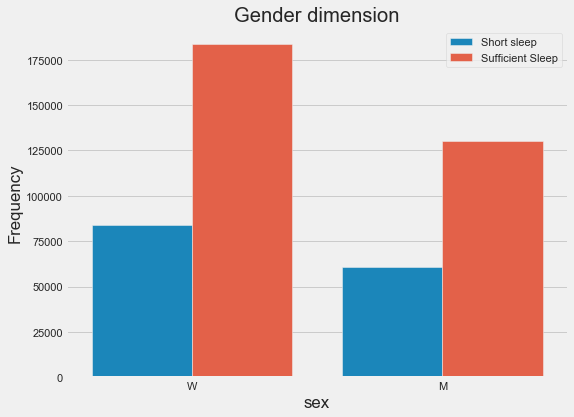

In [24]:
df_gender = df_final.loc[df_final['sex'] != "Refused"]

ax = sns.countplot(x="sex", hue="sleep", data=df_gender)
ax.set_title("Gender dimension")
ax.set_ylabel("Frequency")
ax.legend(labels=labels_sleep_legend)

### Are Short sleep and gender independent or dependent?

In [11]:
ct1 = pd.crosstab(df_gender['sleep'], df_gender['sex'])
print (ct1)
print("-----column percentages-----")
#generate the column percentages 
colsum=ct1.sum(axis=0) #columns
colpct=ct1/colsum
print(colpct)
print("-----Chi-square calculations-----")

#Chi-square calculations - Chi-square test of independence of variables in a contingency table.
print ('Chi-square value, p value, Degrees of freedom, Expected counts/frequencies')
cs1= sp.chi2_contingency(ct1)
print (cs1)

sex         M       W
sleep                
False   60698   83695
True   130158  183621
-----column percentages-----
sex          M         W
sleep                   
False  0.31803  0.313094
True   0.68197  0.686906
-----Chi-square calculations-----
Chi-square value, p value, Degrees of freedom, Expected counts/frequencies
(12.549713837444347, 0.000396266980610417, 1, array([[ 60148.30763993,  84244.69236007],
       [130707.69236007, 183071.30763993]]))


We can conclude that sleeping hours and gender are not independent from one another. The p-value is much lower than 0.05 so we reject the null hypothesis and conclude that there is a statistically significant correlation between gender and hours of sleep

### Age

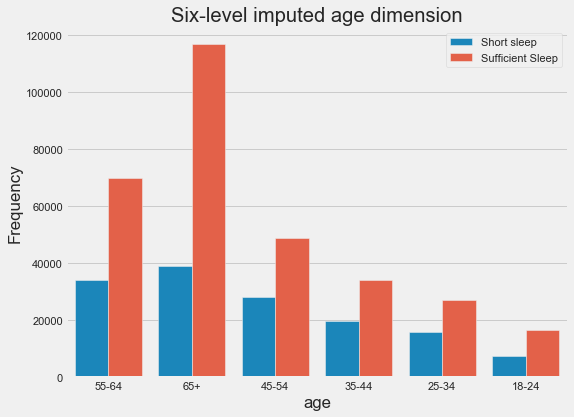

In [25]:
ax = sns.countplot(x="age", hue="sleep", data=df_final)
ax.set_title("Six-level imputed age dimension")
ax.set_ylabel("Frequency")
ax.legend(labels=labels_sleep_legend)

### Art short sleep and age independent or dependent?

In [13]:
ct1 = pd.crosstab(df_final['sleep'], df_final['age'])
print (ct1)
print("-----column percentages-----")
#generate the column percentages 
colsum=ct1.sum(axis=0) #columns
colpct=ct1/colsum
print(colpct)
print("-----Chi-square calculations-----")

#Chi-square calculations 
print ('Chi-square value, p value, Degrees of freedom, Expected counts/frequencies')
cs1= sp.chi2_contingency(ct1)
print (cs1)

age    18-24  25-34  35-44  45-54  55-64     65+
sleep                                           
False   7472  15995  19758  28024  34157   38987
True   16520  27280  34261  48758  70076  116884
-----column percentages-----
age       18-24     25-34    35-44     45-54     55-64       65+
sleep                                                           
False  0.311437  0.369613  0.36576  0.364981  0.327699  0.250123
True   0.688563  0.630387  0.63424  0.635019  0.672301  0.749877
-----Chi-square calculations-----
Chi-square value, p value, Degrees of freedom, Expected counts/frequencies
(5250.530930565736, 0.0, 5, array([[  7561.08373275,  13638.12514732,  17024.09895629,
         24197.86308635,  32849.05138027,  49122.77769702],
       [ 16430.91626725,  29636.87485268,  36994.90104371,
         52584.13691365,  71383.94861973, 106748.22230298]]))


We can conclude that sleeping hours and age are not independent from one another. The p-value is much lower than 0.05 so we reject the null hypothesis and conclude that there is a statistically significant correlation between age and hours of sleep

### Race

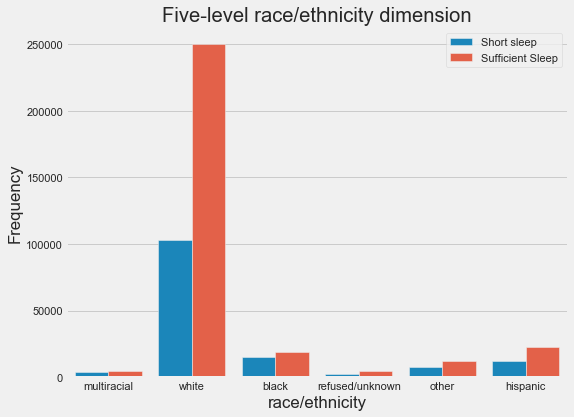

In [26]:
ax = sns.countplot(x="race", hue="sleep", data=df_final)
ax.set_title("Five-level race/ethnicity dimension")
ax.set_ylabel("Frequency")
ax.set_xlabel("race/ethnicity")
ax.legend(labels=labels_sleep_legend)

### Are Short sleep and race/ethnicity independent or dependent?

In [15]:
ct1 = pd.crosstab(df_final['sleep'], df_final['race'])
print (ct1)
print("-----column percentages-----")
#generate the column percentages 
colsum=ct1.sum(axis=0) #columns
colpct=ct1/colsum
print(colpct)
print("-----Chi-square calculations-----")

#Chi-square calculations
print ('Chi-square value, p value, Degrees of freedom, Expected counts/frequencies')
cs1= sp.chi2_contingency(ct1)
print (cs1)

race   black  hispanic  multiracial  other  refused/unknown   white
sleep                                                              
False  15047     12508         3741   7769             2575  102720
True   18959     22789         4910  12165             4876  250022
-----column percentages-----
race      black  hispanic  multiracial     other  refused/unknown     white
sleep                                                                      
False  0.442481  0.354364     0.432436  0.389736         0.345591  0.291204
True   0.557519  0.645636     0.567564  0.610264         0.654409  0.708796
-----Chi-square calculations-----
Chi-square value, p value, Degrees of freedom, Expected counts/frequencies
(4840.374462304093, 0.0, 5, array([[ 10716.67709423,  11123.52383094,   2726.28281898,
          6282.01614998,   2348.11389252, 111163.38621336],
       [ 23289.32290577,  24173.47616906,   5924.71718102,
         13651.98385002,   5102.88610748, 241578.61378664]]))


We can conclude that sleeping hours and race/eth are not independent from one another. The p-value is much lower than 0.05 so we reject the null hypothesis and conclude that there is a statistically significant correlation between race/eth and hours of sleep

Similarly, _Education_, _Income_, _health_, _BMI_ and _Smoking habit_ have statistically significant correlation with hour of sleep

### On average, how many hours of sleep do you get in a 24-hour period?

MEAN:  7.07
STD:  1.43


Text(0.5,1,'Hours per night 2016')

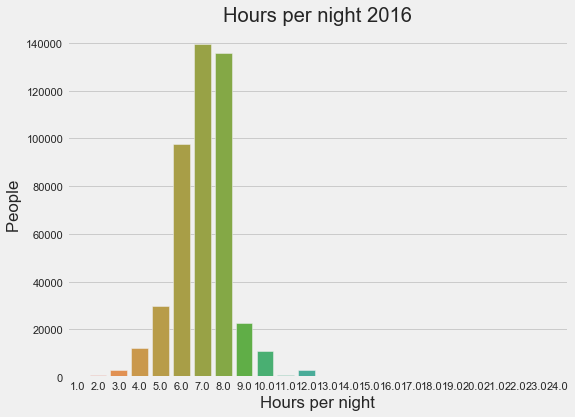

In [27]:
df_final['sleepH']= df_final['sleepH'].astype(float)
mean = round(df_final['sleepH'].mean(),2)
std = round(df_final['sleepH'].std(),2)
print ("MEAN: ", mean)
print ("STD: ", std)

sleep_hour_distro = sns.countplot(x="sleepH", data=df_final)
sleep_hour_distro.set_xlabel("Hours per night")
sleep_hour_distro.set_ylabel("People ")

sleep_hour_distro.set_title("Hours per night 2016")